# Ejemplo de una Red Convolucional:
1. Preprocesamiento de los datos
2. Creación del data set en memoria
3. Definición de X & y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DIRECTORIO = "datasets"
CATEGORIAS = ["Alfalfa", "Asparagus"]



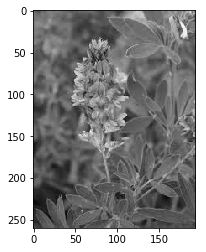

In [2]:
for categoria in CATEGORIAS:  #categorías
    path = os.path.join(DIRECTORIO,categoria)  # acceso a cada directorio de las categorías
    for img in os.listdir(path):  # Iterar cada imagen de perros y gatos
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # Convertir en un arreglo
        plt.imshow(img_array, cmap='gray')  # Graficar un imagen
        plt.show()  # Mostrar
 
        break  # No continuar
    break  #DETENER

In [3]:
datos_entrenamiento = []
IMG_SIZE = 70
def crea_datos_entrenamiento():
    for categoria in CATEGORIAS:
        path = os.path.join(DIRECTORIO,categoria)  #
        class_num = CATEGORIAS.index(categoria)  # Clasificación: 0 Perro, 1 Gato
        print(class_num)
        for img in os.listdir(path):  # Iterar cada imagen
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # Convertir a arreglo
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Cambiar el tamaño de cada imagen
                datos_entrenamiento.append([new_array, class_num])  # Agregar a datos
            except Exception as e:
                pass
 
crea_datos_entrenamiento()

0
1


In [4]:
print(len(datos_entrenamiento))

150


# Guardar datos de imágenes: en matrices

In [5]:
import pickle

In [6]:
X = []
y = []

In [7]:
import random
random.shuffle(datos_entrenamiento)

In [8]:
for m, clase in datos_entrenamiento:
    X.append(m)
    y.append(clase)

In [9]:
salida = open("X.pickle", "wb")
pickle.dump(X, salida)
salida.close()
salida = open("y.pickle", "wb")
pickle.dump(y, salida)
salida.close()

# Creación del modelo

In [10]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

import pickle

Using TensorFlow backend.


In [11]:
X = np.array(X)
X = X / 255
X

array([[[0.4745098 , 0.29019608, 0.38039216, ..., 0.23529412,
         0.32941176, 0.36862745],
        [0.48627451, 0.29019608, 0.44705882, ..., 0.39607843,
         0.46666667, 0.32941176],
        [0.3254902 , 0.49803922, 0.25490196, ..., 0.25490196,
         0.39607843, 0.35686275],
        ...,
        [0.32156863, 0.16862745, 0.22745098, ..., 0.55294118,
         0.4       , 0.58039216],
        [0.3254902 , 0.50980392, 0.24705882, ..., 0.76078431,
         0.81176471, 0.76862745],
        [0.18039216, 0.26666667, 0.23529412, ..., 0.5254902 ,
         0.74901961, 0.51764706]],

       [[0.29019608, 0.44313725, 0.62352941, ..., 0.72941176,
         0.69019608, 0.69803922],
        [0.54117647, 0.59607843, 0.58823529, ..., 0.85490196,
         0.82745098, 0.82745098],
        [0.59607843, 0.51764706, 0.36862745, ..., 0.85098039,
         0.82745098, 0.81176471],
        ...,
        [0.30196078, 0.48235294, 0.27843137, ..., 0.23921569,
         0.45098039, 0.5254902 ],
        [0.5

In [12]:
X = X.reshape(-1,70,70,1)

In [13]:
modelo = Sequential()
modelo.add(Conv2D(32, (3,3), input_shape=X.shape[1:]))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Flatten())
modelo.add(Dense(1))
modelo.add(Activation('sigmoid'))


In [14]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 68, 68, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 36993     
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________


In [15]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
modelo.fit(X, y, batch_size=32, epochs=10, validation_split=.25)

Train on 112 samples, validate on 38 samples
Epoch 1/10
112/112 [==============================] - 1s 10ms/step - loss: 0.7664 - acc: 0.6339 - val_loss: 0.7997 - val_acc: 0.2368
Epoch 2/10
112/112 [==============================] - 1s 9ms/step - loss: 0.6903 - acc: 0.4911 - val_loss: 0.5140 - val_acc: 0.7632
Epoch 3/10
112/112 [==============================] - 1s 9ms/step - loss: 0.6300 - acc: 0.6339 - val_loss: 0.5309 - val_acc: 0.7632
Epoch 4/10
112/112 [==============================] - 1s 10ms/step - loss: 0.5692 - acc: 0.6339 - val_loss: 0.5664 - val_acc: 0.7895
Epoch 5/10
112/112 [==============================] - 1s 9ms/step - loss: 0.5546 - acc: 0.7679 - val_loss: 0.5407 - val_acc: 0.7895
Epoch 6/10
112/112 [==============================] - 1s 9ms/step - loss: 0.5147 - acc: 0.7232 - val_loss: 0.5224 - val_acc: 0.7895
Epoch 7/10
112/112 [==============================] - 1s 10ms/step - loss: 0.4969 - acc: 0.7500 - val_loss: 0.5403 - val_acc: 0.7895
Epoch 8/10
112/112 [========

In [17]:
modelo.save('modelo.model')
import cv2
import keras
import tensorflow as tf

In [18]:
def carga(rutaImg):
    imgSize = 70
    imgArray = cv2.imread(rutaImg, cv2.IMREAD_GRAYSCALE)
    nImgArray = cv2.resize(imgArray, (imgSize, imgSize))
    return nImgArray.reshape(-1, imgSize, imgSize, 1)

In [19]:
modelo = keras.models.load_model('modelo.model')

In [22]:
nombre = input("imagen? ")
p = modelo.predict([carga(nombre)])
print(p)
print(CATEGORIAS[int(p[0][0])])

imagen?  asparagus-test1.jpg


[[1.]]
Asparagus


In [28]:
nombre2 = input("imagen? ")
p2 = modelo.predict([carga(nombre2)])
print(p2)
print(CATEGORIAS[int(p2[0][0])])

imagen?  Alfalfa_test1.jpeg


[[1.]]
Asparagus


In [34]:
nombre3 = input("imagen? ")
p3 = modelo.predict([carga(nombre3)])
print(p3)
print(CATEGORIAS[int(p3[0][0])])

imagen?  Alfalfa_test4.jpg


[[1.]]
Asparagus
